## **Inferential Statistics Report**

Exercise on Inferential Statistics 

Benhur Tedros

## Explaratory data Analysis (EDA) and Inferential Statistics

Explaratory data analysis for this dataset is useful in determining relationships among the explanatory variables, preliminary selection of appropriate models and assessing the direction and rough size of relationships between explanatory and outcome variables. This section will try to answer if there are variables in dataset that are particularly significant in terms of explaining the mortality rate. Moreover, are there strong correlations between pairs of independent variables, or between an independent and a dependent variable (mortality rate)? Before hand, it is vital to explore the distribution of the mortality rate in the facilities across the States. The mean and median of the mortality rate across the States will be explored. Further, the independent variables will be plotted against the mortality rate.  

#### Hypothesis:

Some of the health data such as readmission rate, hospitalization rate, standard infection rate are believed to show a weak to strong correlations to the mortality rate. Moreover, patients with arteriovenous_fistulae has a lower risk of infection than patients with catheters, and so does their mortality rate. The increasing or decreasing trends of some independent variables will expalin the mortality rate pattern in a positive or negative way. 

Null Hypothesis, 
- Ho: There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

Alternative Hypothesis, 
- Ha:There is no correlation between the pairs of independent variables, or between an independent and a dependent variable (mortality rate).

This hypothesis will be tested in this section.

The dataset is stored in MS Excel spreadsheet in CSV format, which was easily loaded into pandas dataframes. The dataset was wrangled and cleaned before using for analysis.

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project'

In [3]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.shape

(6810, 98)

In [4]:
# Subsetting the features needed for the prediction
feature_select = pd.DataFrame(data.iloc[:,[0,1,4,9,11,13,14,16,17,18,19,20,25,27,29,32,33,36,38,39,40,41,42,43,44,46,48,
                                           49,51,52,53,54,55,57,58,59,60,61,71,72,73,74,77,80,84,85,86,87,91,94]])


In [5]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Provider Number':'Provider_num','Profit or Non-Profit':'Profit_YesNo','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Number of Dialysis Patients with Hgb data':'HgbPatient_num','Number of patients included in the transfusion summary':
                                      'Transfus_patientNum','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Number of Adult HD patients with Kt/V data':'Kt/VPatient_Num','Number of Adult HD patient-months with Kt/V data':'Kt/VPatient_MonthNum',
                                      'Number of Adult PD patients with Kt/V data':'PD_Patient_Kt/V_Num','Number of Pediatric HD patient-months with Kt/V data':
                                      'Kt/V-HDPediatric_MonthNum','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Number of Adult patients included in arterial venous fistula and catheter summaries':'NumPat_AVFC',
                                      'Number of Adult patient-months included in arterial venous fistula and catheter summaries':'NumPat-Mon_AVFC',
                                      'Number of patients in hypercalcemia summary':'NumPat_HypercalcemiaSum','Number of patient-months in hypercalcemia summary':
                                      'NumPat-Mon_HypercalcSum','Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Number of patients in Serum phosphorus summary':'NumPat_SerumPhos','Number of patient-months in Serum phosphorus summary ':'NumPat-Mon_SerumPhos',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Number of patients included in hospitalization summary':'NumPat_Hospit','Number of hospitalizations included in hospital readmission summary':
                                      'NumHospt_Hospt-Readmit','Number of patients included in survival summary':'NumPat_Survival',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate','Number of pediatric PD patients with Kt/V data':
                                      'NumPediat-PD_Kt/V','Number of pediatric PD patient-months with KT/V data':'NumPediat-PDMon_Kt/V',
                                      'Percentage of pediatric PD patients with Kt/V>=1.8':'PD_Pediat_Kt/V>=1.8', 'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 

features_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 50 columns):
Provider_num                                        6810 non-null object
Network                                             6810 non-null int64
Five Star                                           6017 non-null float64
State                                               6810 non-null object
County                                              6810 non-null object
Profit_YesNo                                        6810 non-null object
Chain Owned                                         6810 non-null bool
Late Shift                                          6810 non-null bool
Dial_Stations                                       6810 non-null int64
hemodial_incenter                                   6810 non-null bool
perit_incenter                                      6810 non-null bool
hemoTrain_home                                      6810 non-null bool
Medicare_Patient_Hgb<10     

In [6]:
## regrouping the columns to line up the predictor variables together and 
# move the mortality rate(the response variable) to the last column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(94, cols.pop(cols.index('Mortality_rate')))

# To reorder the columns
features_all = features_all.ix[:, cols]


In [7]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['Chain Owned']=numeric.fit_transform(features_all['Chain Owned'].astype('str'))
features_all['Late Shift']=numeric.fit_transform(features_all['Late Shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))


In [8]:
# There are some null values in the response variable,Mortality rate, and the null/missing values are dropped.
mortality_na=features_all.dropna(subset=['Mortality_rate'],how='any')

In [9]:
# Let us find out the percentile of the mortality rate which will be converted into
# catagorical varibales of low, medium and high mortality rates
mortality_na['Mortality_rate'].describe()

count    6140.000000
mean       17.554723
std         4.946509
min         0.000000
25%        14.500000
50%        17.200000
75%        20.025000
max        66.400000
Name: Mortality_rate, dtype: float64

In [10]:
# Assigning the categoricable variable based on the percentile

mortality_na['Mort_category'] = ''
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 0) & (mortality_na['Mortality_rate'] < 14.50)] = '0_very low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 14.50) & (mortality_na['Mortality_rate'] < 17.20)] = '1_low'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 17.20) & (mortality_na['Mortality_rate'] < 20.025)] = '2_medium'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 20.025) & (mortality_na['Mortality_rate'] < 30.00)] = '3_high'
mortality_na['Mort_category'][(mortality_na['Mortality_rate'] >= 30.00) & (mortality_na['Mortality_rate'] < 67)] = '4_very high'

# We need to convert the mortality rate groups into digit

mortality_na = mortality_na.sort_values(by='Mort_category')
mortality_na['Mort_category_digit'] = pd.factorize(mortality_na['Mort_category'])[0]

mortality_na

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\benbahtin\Anaconda3\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\benbahtin\A

,Provider_num,Network,Five Star,State,County,Profit_YesNo,Chain Owned,Late Shift,Dial_Stations,hemodial_incenter,...,Hospitalization_rate,NumPediat-PD_Kt/V,NumPediat-PDMon_Kt/V,PD_Pediat_Kt/V>=1.8,PD_Pat_Kt/V>=1.7,Infection_ratio,Transfusion_rate,Mortality_rate,Mort_category,Mort_category_digit
4,32504,15,NaN,AZ,MARICOPA,1,1,0,8,0,...,105.6,0.0,0.0,NaN,NaN,NaN,NaN,13.0,0_very low,0
3211,362674,9,5.0,OH,PUTNAM,1,0,0,12,1,...,257.1,0.0,0.0,NaN,NaN,0.69,6.8,13.9,0_very low,0
3214,372600,13,5.0,OK,MCCURTAIN,1,1,0,17,1,...,94.4,0.0,0.0,NaN,97.0,NaN,13.3,11.4,0_very low,0
3215,272507,16,4.0,MT,MISSOULA,1,1,1,25,1,...,120.4,0.0,0.0,NaN,97.0,0.67,18.5,11.9,0_very low,0
3217,302510,1,5.0,NH,ROCKINGHAM,1,1,1,13,1,...,118.8,0.0,0.0,NaN,NaN,0.78,29.7,13.4,0_very low,0
3221,242547,11,5.0,MN,HENNEPIN,1,1,1,20,1,...,111.7,0.0,0.0,NaN,NaN,0.00,16.0,10.3,0_very low,0
3224,672566,14,3.0,TX,WEBB,1,1,0,24,1,...,150.6,0.0,0.0,NaN,77.0,0.93,62.7,13.4,0_very low,0
3210,202503,1,3.0,ME,YORK,1,1,1,18,1,...,186.2,0.0,0.0,NaN,90.0,0.00,24.9,14.2,0_very low,0
3232,333544,2,3.0,NY,KINGS,0,0,1,24,1,...,206.3,0.0,0.0,NaN,57.0,NaN,50.8,11.7,0_very low,0
3237,262591,12,4.0,MO,SAINT LOUIS,1,1,1,12,1,...,218.4,0.0,0.0,NaN,NaN,4.43,36.5,11.5,0_very low,0


In [11]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= mortality_na[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2','HD_Pediatric_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')
    

In [34]:
#Loading county based population dataset

pop_county= pd.read_csv('Population_county.csv',encoding='latin-1')

# Selecting the population size as of recent estimate(2016) and for all ages together

pop_county.loc[(pop_county['YEAR'] == 9) & (pop_county['AGEGRP'] == 0), :]

# Slicing the dataset based on County and State, as the county with the same name may exist in different states.

pop_county = pop_county.groupby(['County','State'],as_index=False).sum()

# Before merging the datasets, the county names used in both data frames should be the same.
# To fulfill that, all are converted to upper case, and any space within two words county name were deleted

pop_county['County']=pop_county['County'].str.upper()
pop_county['County']=pop_county['County'].str.replace('\s+', '')
mortality_na['County']=mortality_na['County'].str.replace('\s+', '')

# Merging the population table with the mortality table based on county and state
mort_pop = pd.merge(mortality_na, pop_county, how='left',on=['County','State'])

In [36]:
#Loading county based income dataset
income_county = pd.read_csv('Income_County.csv',encoding='latin-1')

# Listing the states' name with its abbreviations
state = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
        'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin',
        'WV': 'West Virginia','WY': 'Wyoming'}

# Adding the abbreviations to the datasets
state= {State: abbrev for abbrev, State in state.items()}
income_county['State'] = income_county['State'].map(state)

# Converting the county name into uppercase letters, and any spaces between two worded county name has been omitted.
income_county['County'] = income_county['County'].str.upper()
income_county['County']=income_county['County'].str.replace('\s+', '')

# Merging the income info with the mortality table based on county and state
mort_popIncome = pd.merge(mort_pop, income_county,how='left',on=['County','State'])

# Dropping population variable from the dataset, as we already have a population feature added from the other dataset
total_mortRate = mort_popIncome.loc[:,mort_popIncome.columns!='Population']
total_mortRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6140 entries, 0 to 6139
Data columns (total 74 columns):
Provider_num                                        6140 non-null object
Network                                             6140 non-null int64
Five Star                                           5939 non-null float64
State                                               6140 non-null object
County                                              6140 non-null object
Profit_YesNo                                        6140 non-null int64
Chain Owned                                         6140 non-null int64
Late Shift                                          6140 non-null int64
Dial_Stations                                       6140 non-null int64
hemodial_incenter                                   6140 non-null int64
perit_incenter                                      6140 non-null int64
hemoTrain_home                                      6140 non-null int64
Medicare_Patient_Hgb<10 

The dataset was cleaned and subset to 6140 observations and 74 data field. The "Mortality rate" column is our field of interest. The dataset is now ready for exploratory analysis and applying inferential statistics.

## Applying EDA and Inferential Statistics

#### Plot-1: Mortality rate vs States

In [14]:
# To explore the distribution and variance of the mortality rate through out the States,
# it is good to find the mean and median of the mortality rate on State basis. 

mort_state = total_mortRate.groupby('State',as_index=True)['Mortality_rate'].agg(['mean', 'median'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')

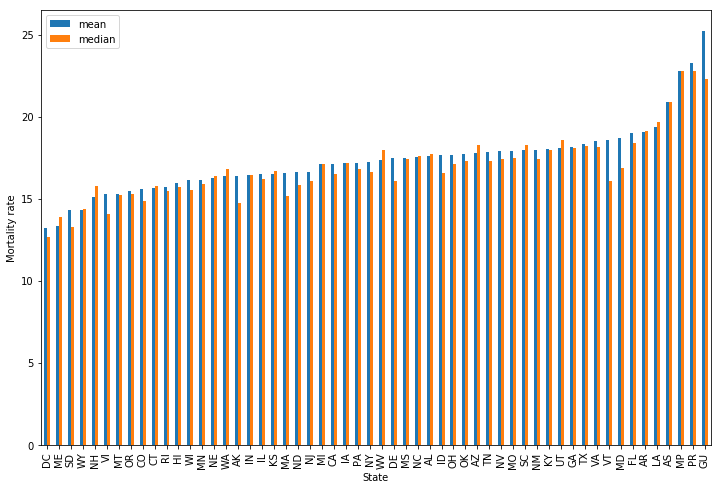

In [15]:
# Ploting the mean of the mortality rate against the States
mort_state.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

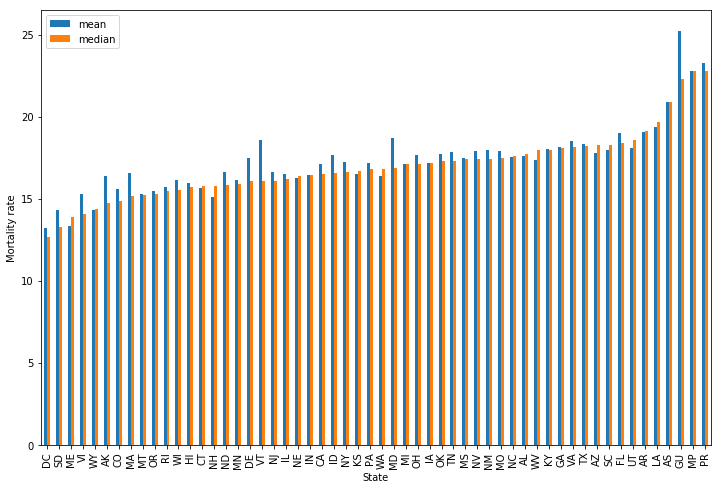

In [16]:
# Ploting the median of the mortality rate against the States
mort_state1.plot.bar(figsize=(12,8)).set_ylabel('Mortality rate')

The plots in the above shows that the mean and median of the mortality rate across the State donot coincide. This can tell us that the mortality rate distribution looks like asymmetric in some of the States. This means that the difference in mortality rate of some dialysis facilities within one State may be higher. For example, the States DC, SD, VI, AK, NJ, DE, GU, MI, VT, MD show relatively significant difference in the mean and median of the mortality rate. Higher mortality rate is observed in the States of AS, GU, MP and PR, while the mortality rate in DC, SD, ME, VI holds a lower values.  

#### Plot-2: Mortality rate against 26 features (independent variables)

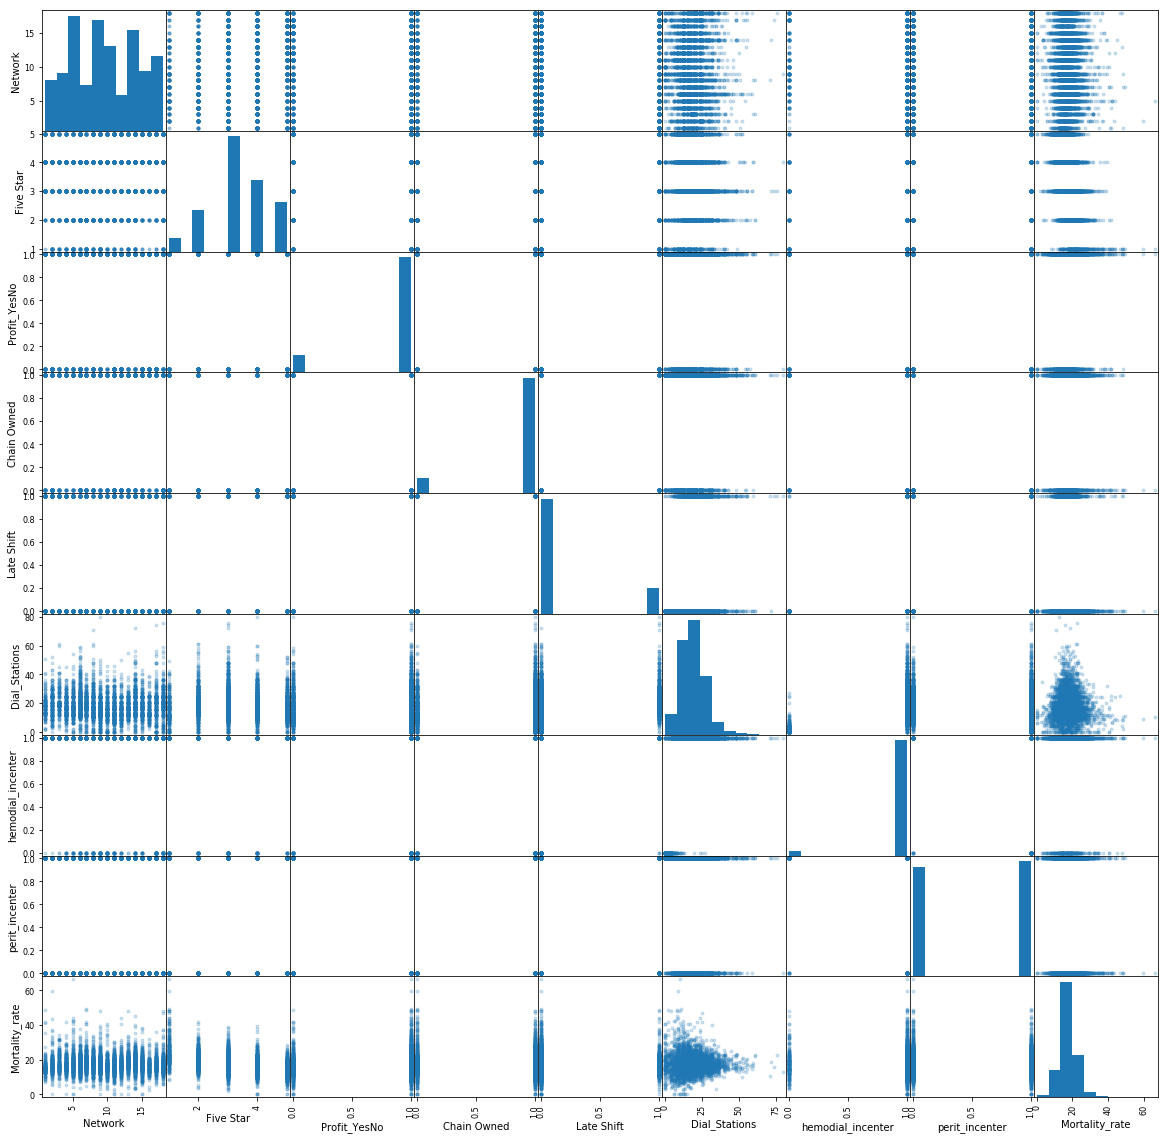

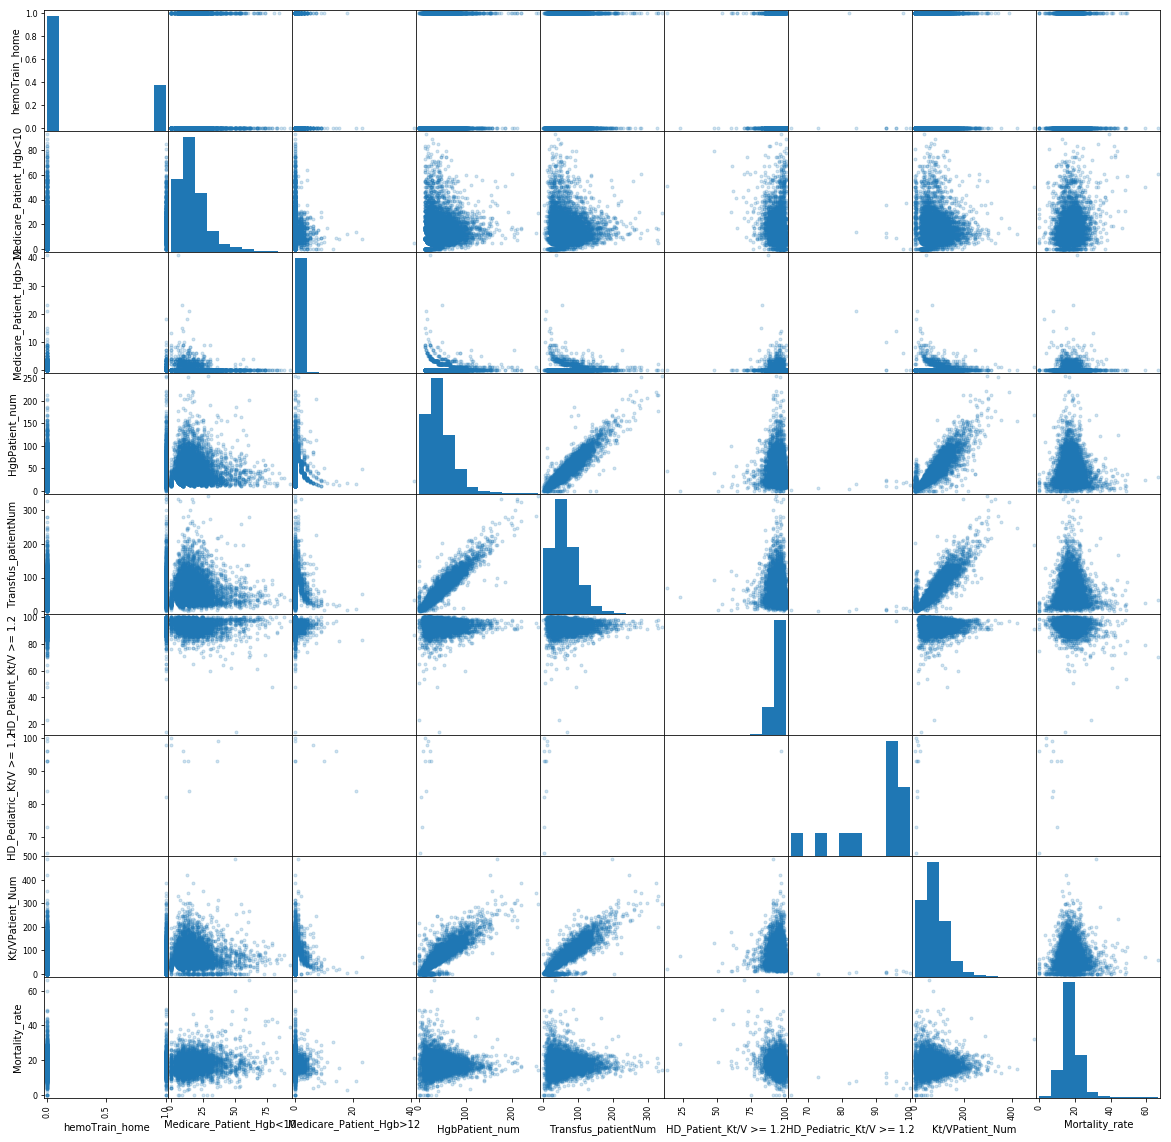

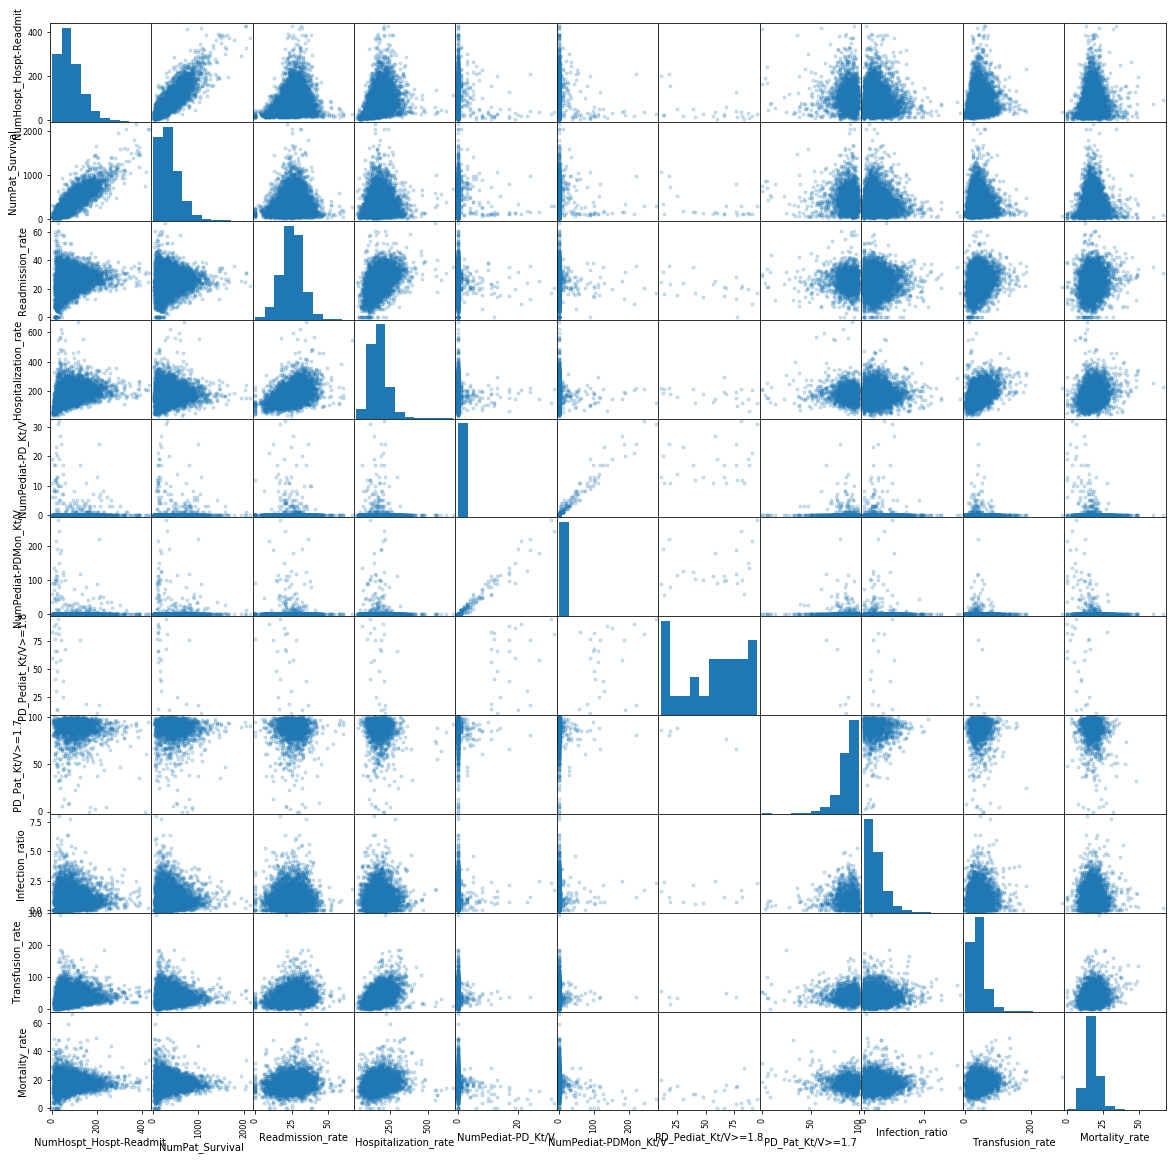

In [37]:
# Exploring the features and their relationship pattern among each other 

from pandas.tools.plotting import scatter_matrix

test = total_mortRate.iloc[:, np.r_[0:11,49]]
test = scatter_matrix(test, alpha=0.2, figsize=(20, 20),diagonal='hist')

test1 = total_mortRate.iloc[:, np.r_[11:19,49]]
test1 = scatter_matrix(test1, alpha=0.2, figsize=(20, 20),diagonal='hist')


test4 = total_mortRate.iloc[:, np.r_[39:49,49]]
test4 = scatter_matrix(test4, alpha=0.2, figsize=(20, 20),diagonal='hist')


The above plots shows that the trend of the mortality rate varies from one predictor to another. For example, the mortality rate indicates an increasing trend with hospitalization, readmission and tranfusion rates, while infection ratio seem to show not a strong trend with the mortality rate. However, the other features did not seem to show any significant trend against the mortality rate. 

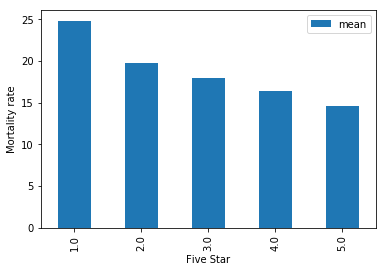

In [38]:
# Exploring the mortality rate against the Five star reviews

five=total_mortRate.iloc[:, np.r_[2,49]]
star = five.groupby('Five Star',as_index=True)['Mortality_rate'].agg(['mean'])
star.plot.bar().set_ylabel('Mortality rate')

To use the scatter plot to display some of features such as five star (ranges from 0 to 5) was not good enough. For the five star field, a bar plot would be better. As it is displayed above, the bar plot described the relationship between the two variables. As expected, the better the facilities are the lower the mortality rate.

#### Plot-3: Mortality rate against 10 features (independent variables)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

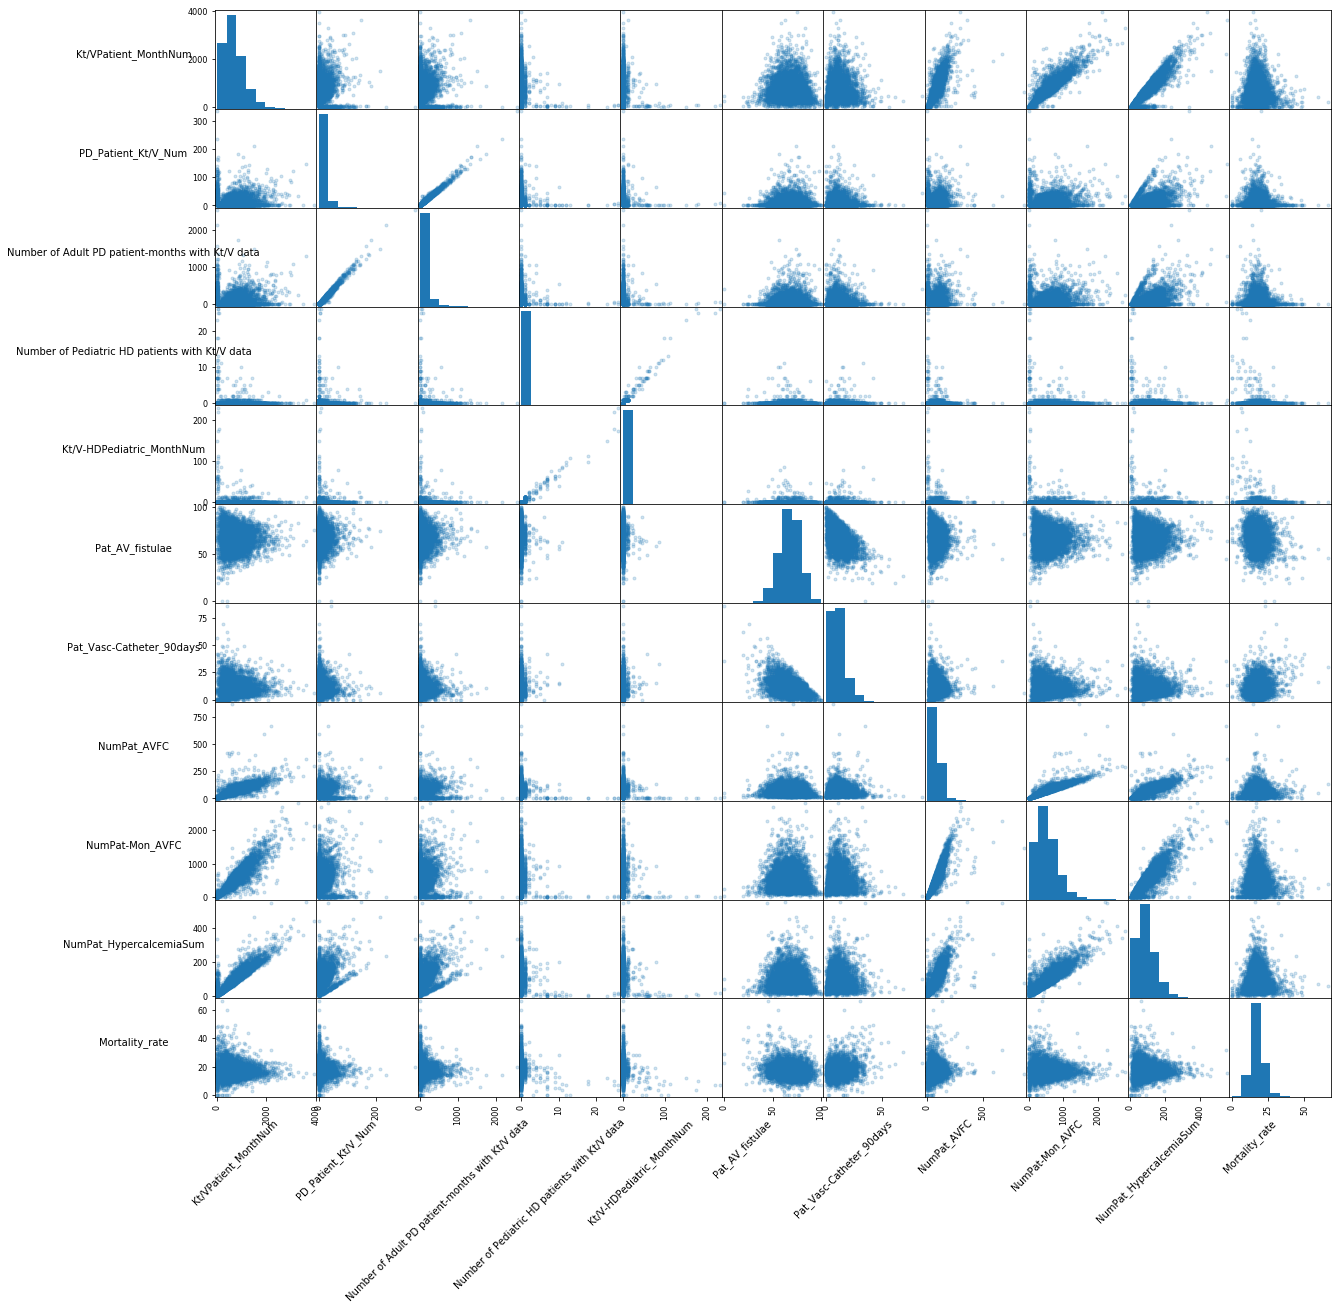

In [39]:
test2 = total_mortRate.iloc[:, np.r_[19:29,49]]
test2 = scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test2.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test2.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test2.reshape(-1)]
[ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test2.reshape(-1)]

Based the above plot-3, the mortality rate shows a clear increasing trend when the percentage of patients with vascular catheter in use for 90 days or longer increases. Other features did not indicate any trend with the mortality rate.Based the above plot-2, the mortality rate shows a clear increasing trend when the percentage of patients with vascular catheter in use for 90 days or longer increases. Other features did not indicate any trend with the mortality rate.

#### Plot-4: Mortality rate against the rest of features (independent variables)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

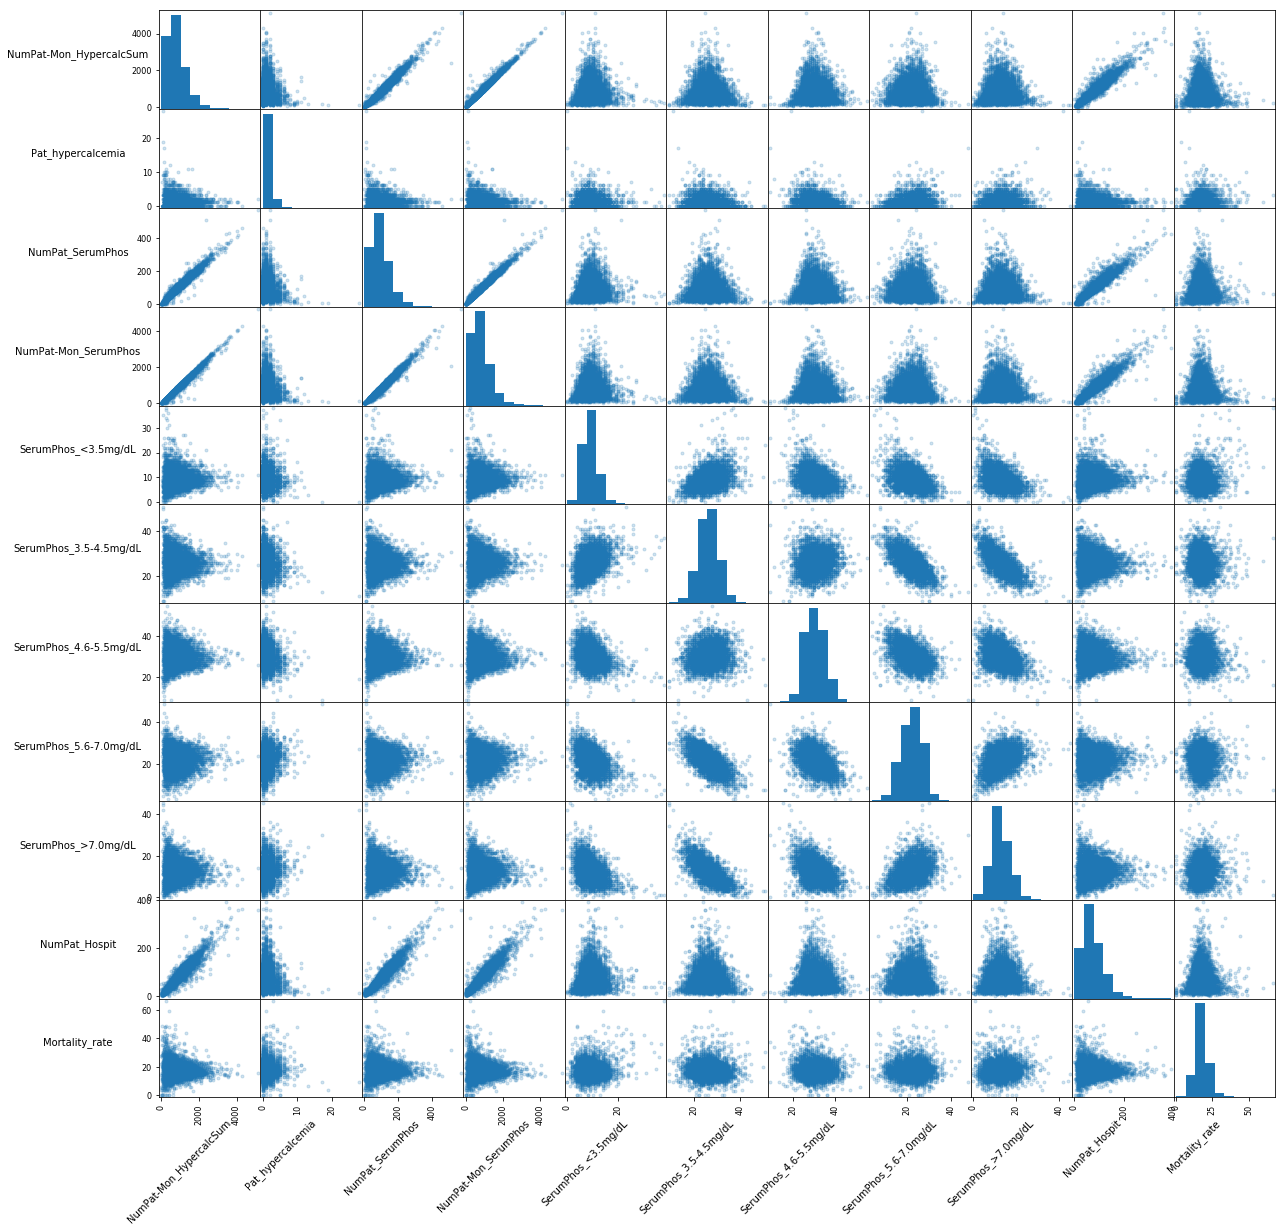

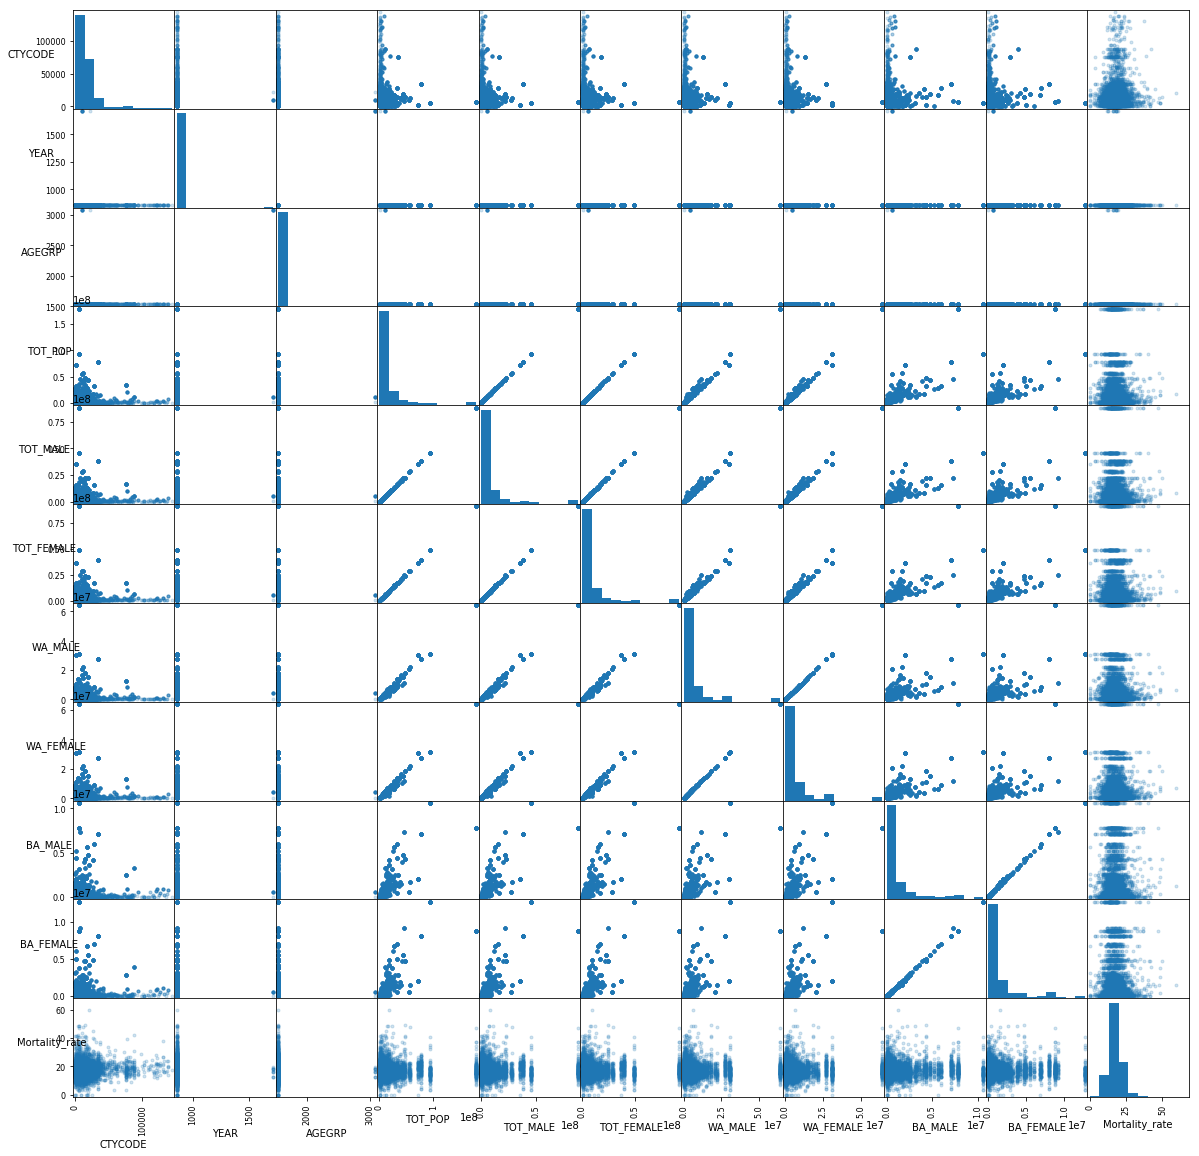

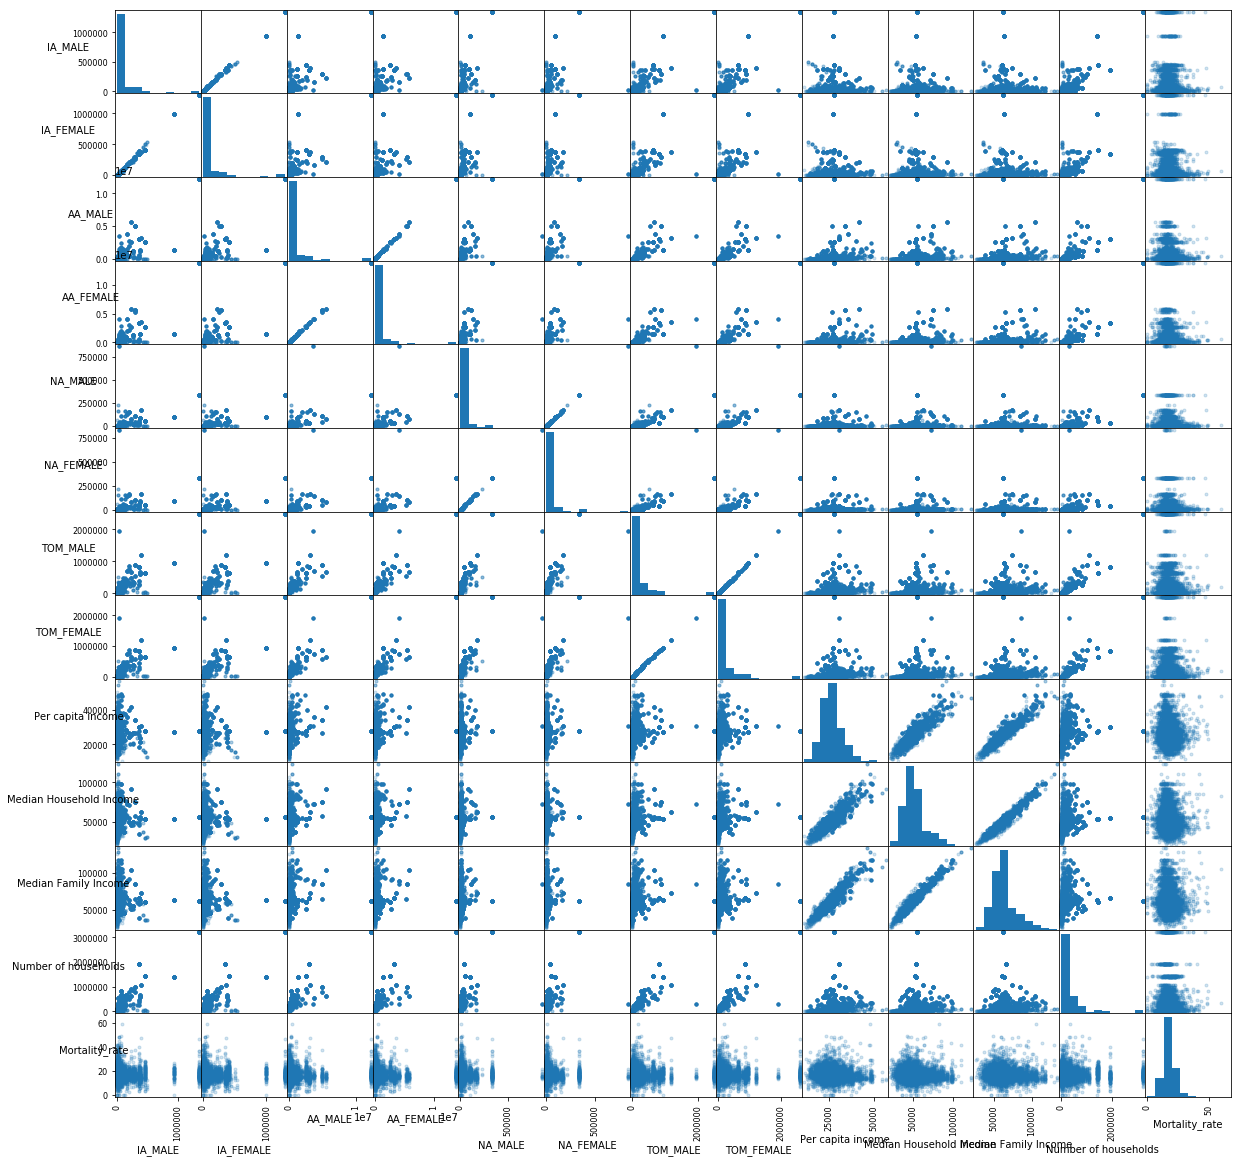

In [40]:
test3 = total_mortRate.iloc[:, np.r_[29:39,49]]
test3 = scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist')

#Change label rotation
[ax.xaxis.label.set_rotation(45) for ax in test3.reshape(-1)]
[ax.yaxis.label.set_rotation(0) for ax in test3.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[ax.get_yaxis().set_label_coords(-0.8,0.5) for ax in test3.reshape(-1)]
[ax.get_xaxis().set_label_coords(0.2,-0.2) for ax in test3.reshape(-1)]


test5 = total_mortRate.iloc[:, np.r_[52:62,49]]
test5 = scatter_matrix(test5, alpha=0.2, figsize=(20, 20), diagonal='hist')
[ax.yaxis.label.set_rotation(0) for ax in test5.reshape(-1)]

test6 = total_mortRate.iloc[:, np.r_[62:74,49]]
test6 = scatter_matrix(test6, alpha=0.2, figsize=(20, 20), diagonal='hist')
[ax.yaxis.label.set_rotation(0) for ax in test6.reshape(-1)]


From plot-4, the only feature which shows a certain pattern against mortality rate is the percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. The mortality rate increased with an increase in percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL. No significant trend in the mortality rate was observed with a change in the other features' values.

#### Plot-5: Mortality rate against correlated features (independent variables)

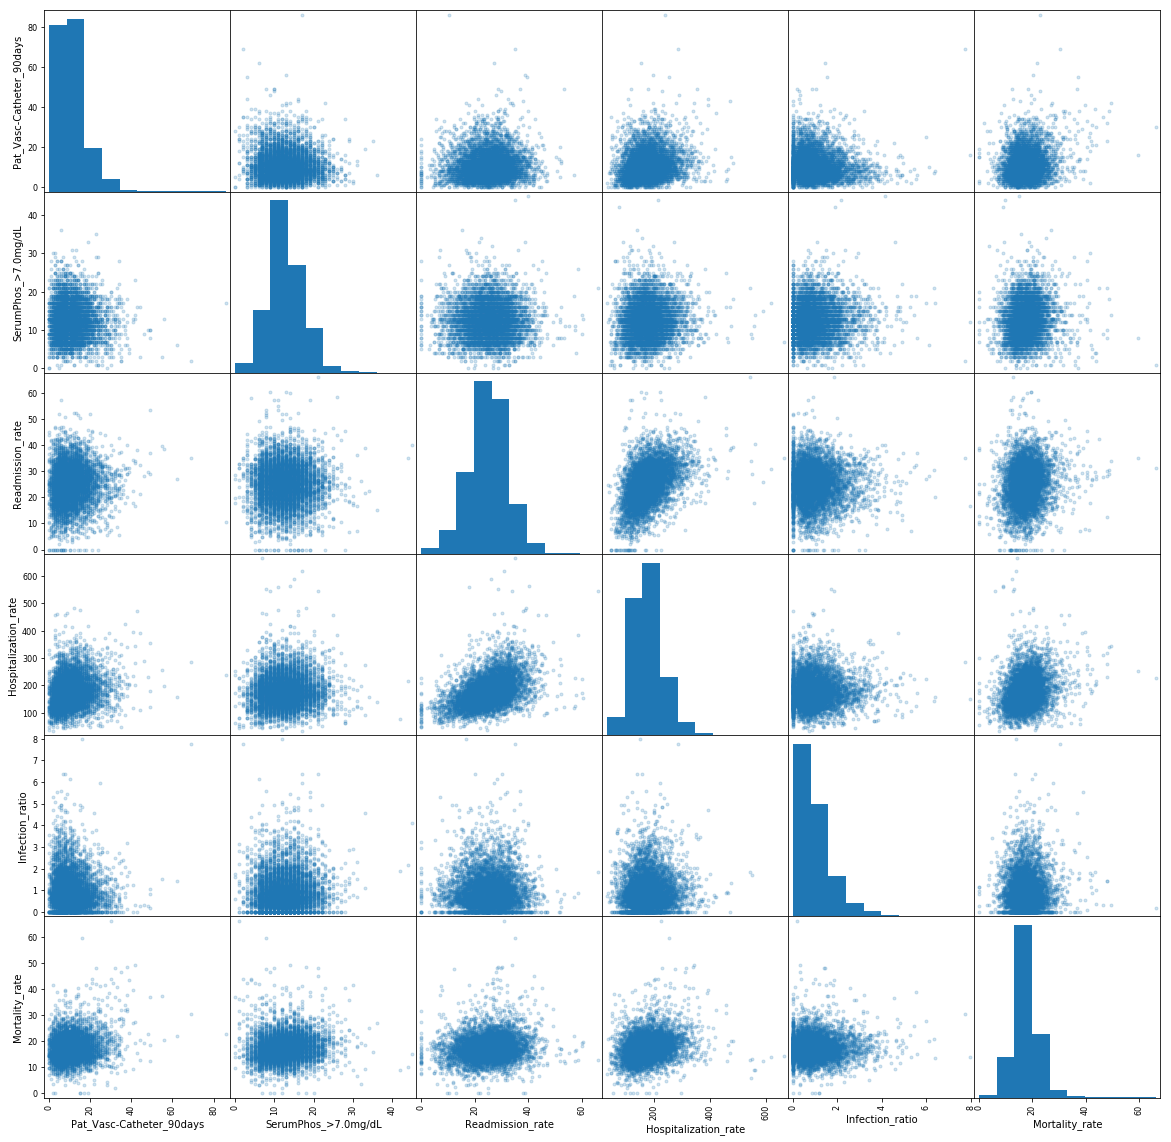

In [60]:
# # Ploting the mortality rate against those features which showes some pattern/trend
relate = mortality_na.iloc[:, [25,37,41,42,47,49,50]]
relate = scatter_matrix(relate, alpha=0.2, figsize=(20, 20), diagonal='hist')

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
import statsmodels.api as sm

In [59]:
# Separating the predictors and the target variables
x = total_mortRate.loc[:, total_mortRate.columns != 'Mort_category_digit']
y = total_mortRate.loc[:, 'Mort_category_digit']

x=x.loc[:,x.columns != 'State']
x=x.loc[:,x.columns != 'County']
x=x.loc[:,x.columns != 'Mortality_rate']
x=x.loc[:,x.columns != 'Mort_category']
x=x.loc[:,x.columns != 'Provider_num']
x=x.loc[:,x.columns != 'CTYCODE']
x=x.loc[:,x.columns != 'YEAR']
x=x.loc[:,x.columns != 'AGEGRP']


X=x.values[:,0:65]
y=y.values[:,]

# Create our imputer to replace missing values with the median 
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp = imp.fit(X)

# Impute our data, then train
mortality_imp = imp.transform(X)

# Standarizing the dataset
X_scaled = preprocessing.scale(mortality_imp)
best=pd.DataFrame(X_scaled,y)

In [56]:
# Applying Correlation matrix to see the relationships between the response and feature variables

model = sm.OLS(y, X_scaled).fit()
predictions = model.predict(X_scaled)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     11.95
Date:                Wed, 16 Aug 2017   Prob (F-statistic):          7.68e-111
Time:                        10:11:26   Log-Likelihood:                -12323.
No. Observations:                6140   AIC:                         2.477e+04
Df Residuals:                    6077   BIC:                         2.519e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0281      0.032      0.887      0.375        -0.034     0.090
x2            -0.7222      0.043    -16.646      0.000        -0.807    -0.637
x3             0.0652      0.026      2.482      0.013         0.014     0.117
x4            -0.0524      0.026     -1.978      0.048        -0.104    -0.000
x5            -0.0344      0.026     -1.343      0.179        -0.085     0.016
x6             0.0445      0.041      1.085      0.278        -0.036     0.125
x7             0.0294      0.030      0.963      0.336        -0.030     0.089
x8            -0.0421      0.031     -1.370      0.171        -0.102     0.018
x9             0.0044      0.029      0.149      0.882        -0.053     0.062
x10            0.0234      0.026      0.896      0.370        -0.028     0.074
x11            0.0135      0.024      0.569      0.570        -0.033     0.060
x12            0.1726      0.124      1.388      0.165        -0.071     0.416
x13            0.0473      0.154      0.308      0.758        -0.254     0.349
x14            0.0176      0.028      0.620      0.535        -0.038     0.073
x15            0.0040      0.025      0.161      0.872        -0.045     0.053
x16            0.0737      0.486      0.151      0.880        -0.880     1.027
x17            0.0477      0.503      0.095      0.925        -0.939     1.034
x18           -0.1446      0.260     -0.555      0.579        -0.655     0.366
x19            0.1434      0.256      0.559      0.576        -0.359     0.646
x20            0.0404      0.129      0.314      0.754        -0.212     0.293
x21           -0.0677      0.126     -0.537      0.591        -0.315     0.179
x22            0.1917      0.031      6.246      0.000         0.132     0.252
x23           -0.1553      0.031     -5.053      0.000        -0.215    -0.095
x24            0.0191      0.063      0.302      0.763        -0.105     0.143
x25           -0.1643      0.160     -1.024      0.306        -0.479     0.150
x26            0.7530      0.534      1.410      0.159        -0.294     1.800
x27           -1.7537      0.606     -2.893      0.004        -2.942    -0.565
x28           -0.0739      0.025     -2.957      0.003        -0.123    -0.025
x29            0.2219      0.324      0.686      0.493        -0.413     0.856
x30            0.1893      0.402      0.471      0.637        -0.598     0.977
x31            0.0302      0.120      0.251      0.802        -0.205     0.266
x32           -0.0411      0.157     -0.261      0.794        -0.350     0.268
x33            0.0211      0.164      0.129      0.898        -0.300     0.343
x34           -0.0560      0.164     -0.341      0.733        -0.378     0.266
x35            0.0843      0.162      0.521      0.602        -0.233     0.401
x36            0.0641      0.212      0.303      0.762        -0.351     0.479
x3

The categorized mortality rate was ploted against 65 different features which are the health data of patients on dialysis,population and income of the counties where the facilities are located at. After the dataset was wrangled and cleaned, it was utilized for analysis and tried to insight any pattern out of the independent and dependent variables. Based on the scatter plots and correlation matrix, the mortality rate against many of the features did not show a strong linear relationship or have a slight pattern. Their relationships seem to be non-linear in most of them, which should be analysed further by utilizing other types of classification or regression or transformation. The features which showed a linear trend with the mortality rate include the hospitalization rate, readmission rate, tranfusion rate, infection ratio, five star,and percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL (see plot-5). It is a general truth(in most cases), the mortality rate has a positive relationship with the feature listed above. The sample analysis also proved that the mortality rate increases with an increase in the values of the independent variables listed above.

As it can be seen above, a multivariate linear analysis has also been done on the dataset using OLS. The summary of the analysis shows eleven (11) of 65 explanatory variables have their P-value of less than confidence interval of 0.05. This indicates that there is a statistically significant relationship between the 11 features and the response. The R-squared yielded to be 11%, which seems to be low and leaved a large amount of variation in the response variable unexplained. However, the p-values revealed a statistically meaningful relationship between 11 of the independent variables and the response.
